# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitter_training.csv', header=None, names=["ID", "Entity", "Sentiment", "Tweet"])

df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
import re

def clean_tweet(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
        return text.strip()
    else:
        return ""


df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

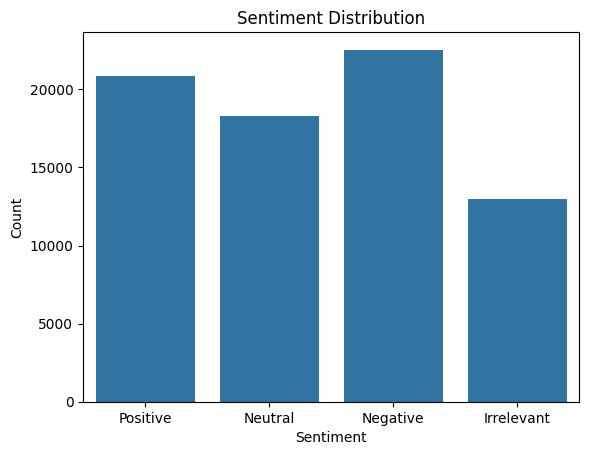

In [5]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

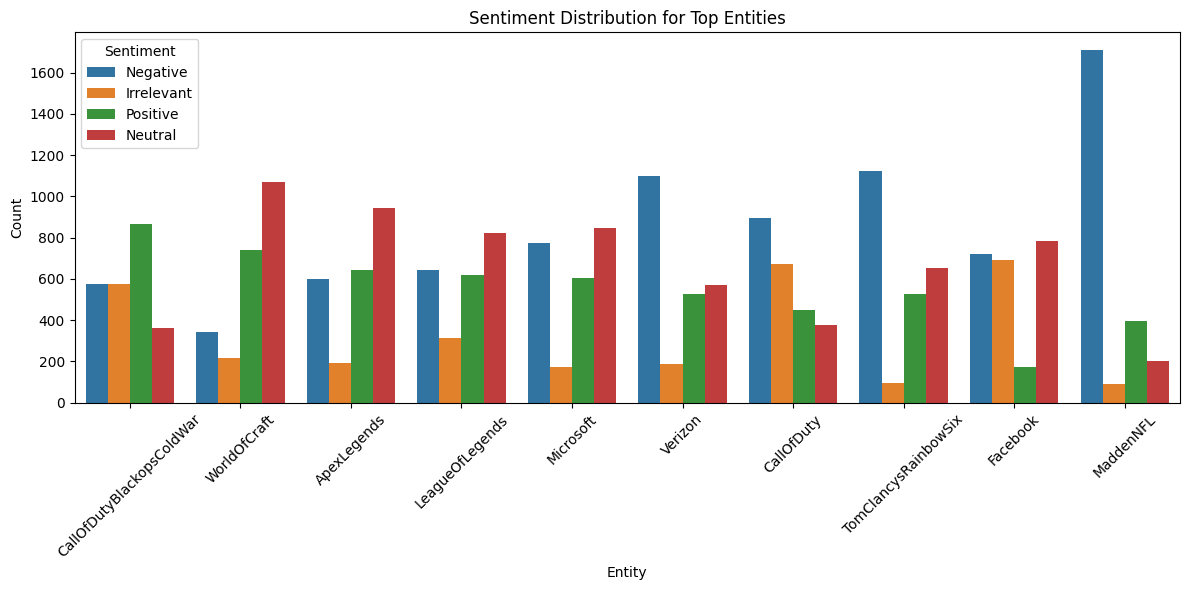

In [6]:
top_entities = df['Entity'].value_counts().nlargest(10).index
df_top_entities = df[df['Entity'].isin(top_entities)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Entity', hue='Sentiment', data=df_top_entities)
plt.title("Sentiment Distribution for Top Entities")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [8]:
vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(df['Clean_Tweet'])
y = df['Sentiment']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.79      0.61      0.69      2592
    Negative       0.78      0.83      0.80      4519
     Neutral       0.72      0.73      0.72      3596
    Positive       0.76      0.80      0.78      4230

    accuracy                           0.76     14937
   macro avg       0.76      0.74      0.75     14937
weighted avg       0.76      0.76      0.76     14937

